<a href="https://colab.research.google.com/github/shekhar5908/Youtube_Analisys/blob/main/youtube_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Fetching Data

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Text recognition project/UScomments.csv", error_bad_lines= False)

<ipython-input-2-571bff91f0af>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("/content/drive/MyDrive/Text recognition project/UScomments.csv", error_bad_lines= False)
Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

<ipython-input-2-571bff91f0af>:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Text recognition project/UScomments.csv", error_bad_lines= False)


In [3]:
data.head(5)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


#Data Preprocessing

In [4]:
data.shape


(691400, 4)

In [5]:
data.isnull()

,video_id,comment_text,likes,replies
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
691395,False,False,False,False
691396,False,False,False,False
691397,False,False,False,False
691398,False,False,False,False


In [6]:
data.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [7]:
data.dropna(inplace= True)

In [8]:
data.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [9]:
data.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

#EDA

##Sentiment Analysis

In [10]:
!pip install textblob

In [11]:
from textblob import TextBlob

In [12]:
data.head(5)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [13]:
polarity = []
for comment in data["comment_text"]:
  try:
    polarity.append(TextBlob(comment).sentiment.polarity)

  except:
    polarity.append(0)


In [14]:
len(polarity)

691375

In [15]:
data["polarity"] = polarity

In [16]:
data.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


Showing whether the sentiment is positive or negetive

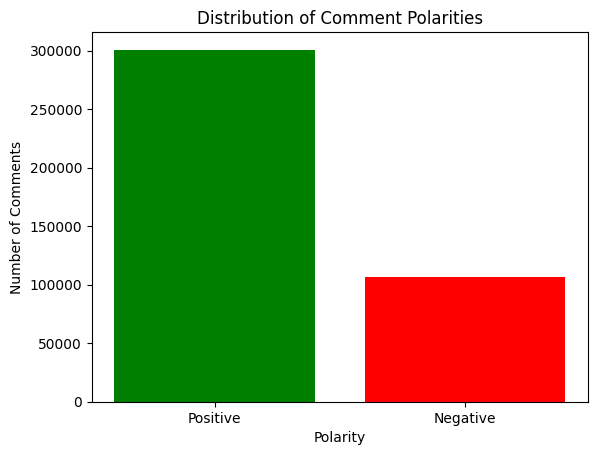

In [17]:
# Assuming 'polarity' is the list of polarities
positive_polarities = [polarity for polarity in polarity if polarity > 0]
negative_polarities = [polarity for polarity in polarity if polarity < 0]

# Count the occurrences of positive and negative polarities
positive_count = len(positive_polarities)
negative_count = len(negative_polarities)

# Create a bar plot
plt.bar(['Positive', 'Negative'], [positive_count, negative_count], color=['green', 'red'])
plt.title('Distribution of Comment Polarities')
plt.xlabel('Polarity')
plt.ylabel('Number of Comments')

# Show the plot
plt.show()

##word Cloud Analysis

In [18]:
filter1 = data["polarity"] == 1

In [19]:
data_positive = data[filter1]

In [20]:
data_positive

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [21]:
filter2 = data["polarity"] == -1

In [22]:
data_negetive = data[filter2]
data_negetive

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690788,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690865,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691073,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691180,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


In [23]:
!pip install wordcloud

In [24]:
from wordcloud import WordCloud , STOPWORDS

In [25]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [26]:
type(data["comment_text"])

pandas.core.series.Series

In [27]:
total_data_positive = " ".join(data_positive["comment_text"])

In [28]:
wordcloud=WordCloud(stopwords= set(STOPWORDS)).generate(total_data_positive)

Showing the positive words

(-0.5, 399.5, 199.5, -0.5)

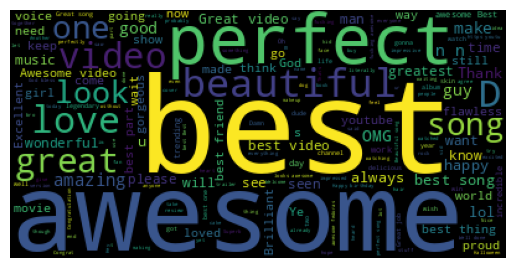

In [29]:
plt.imshow(wordcloud)
plt.axis("off")

In [30]:
total_data_negetive = " ".join(data_negetive["comment_text"])

In [31]:
wordcloud2 =WordCloud(stopwords= set(STOPWORDS)).generate(total_data_negetive)

Showing negetive word

(-0.5, 399.5, 199.5, -0.5)

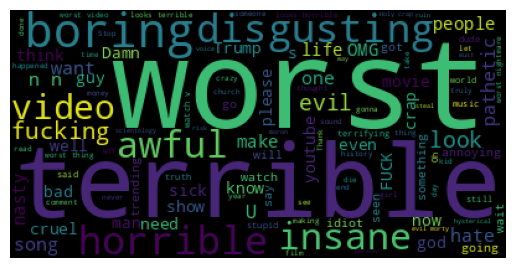

In [32]:
plt.imshow(wordcloud2)
plt.axis("off")

## Emoji Analysis

In [33]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 4.9 MB/s eta 0:00:00


In [34]:
import emoji

In [35]:
emoji.__version__

'2.9.0'

In [36]:
data.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [37]:
comment = "trending 😉	"

In [38]:
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [39]:
emoji_data_list = []

# Iterate through each comment in the "comment_text" column
for comment in data["comment_text"].dropna():

 for char in comment:
   if char in emoji.EMOJI_DATA:
    emoji_data_list.append(char)



In [40]:
emoji_data_list[1:10]

['‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [41]:
from collections import Counter

In [42]:
Counter(emoji_data_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [43]:
Counter(emoji_data_list).most_common(10)[0]

('😂', 36987)

In [44]:
Counter(emoji_data_list).most_common(10)[0][0]

'😂'

In [45]:
Counter(emoji_data_list).most_common(10)[0][1]

36987

In [46]:
emojis = [Counter(emoji_data_list).most_common(10)[i][0] for i in range(10)]

In [47]:
emojis_freq = [Counter(emoji_data_list).most_common(10)[i][1] for i in range(10)]

In [48]:
import plotly.graph_objs as go
from plotly.offline import iplot



In [49]:
trace = go.Bar(x= emojis, y = emojis_freq)

In [50]:
iplot([trace])

#Fetching all Data of Youtube

In [51]:
import os

In [52]:
files =os.listdir(r"/content/drive/MyDrive/Text recognition project/additional_data")

In [53]:
file_csv = [dir for dir in files if ".csv" in dir]

In [54]:
file_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv',
 'full_df.csv']

In [55]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [56]:
# converting all directories into single table
full_df = pd.DataFrame()
path = "/content/drive/MyDrive/Text recognition project/additional_data"

for file in file_csv:
  current_df = pd.read_csv(path+"/"+file , encoding= "iso-8859-1", error_bad_lines= True)

  full_df = pd.concat([full_df, current_df], ignore_index= True)


In [57]:
full_df.shape

(1216827, 19)

#Data Preprocessing

In [58]:
full_df.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Unnamed: 0.1,Unnamed: 0,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420.0,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,NaN,NaN,NaN
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688.0,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,NaN,NaN,NaN
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339.0,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,NaN,NaN,NaN
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989.0,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,NaN,NaN,NaN
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082.0,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,NaN,NaN,NaN
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613.0,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,âº Follow for News! - https://twitter.com/KEE...,NaN,NaN,NaN
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850.0,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...,NaN,NaN,NaN
7,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967.0,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,NaN,NaN,NaN
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123.0,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick âº https://S...,NaN,NaN,NaN
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976.0,1484,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,False,False,False,Sheldon is roasting pastor of the church\nyoun...,NaN,NaN,NaN


In [59]:
# finding the duplicate rows
full_df[full_df.duplicated()].shape

(196089, 19)

In [60]:
# droping the duplicate row
full_df = full_df.drop_duplicates()

In [61]:
full_df.shape

(1020738, 19)

In [62]:
# export the files to database
from sqlalchemy import create_engine


In [63]:
db_path = "/content/drive/MyDrive/Text recognition project/youtube_sample.sqlite"

# Create the SQLite engine
#engine = create_engine(f"sqlite:///{db_path}")



In [64]:
#full_df[1:1000].to_sql("user_data", con= engine, if_exists="append")

In [65]:
#export the full_df file to csv
full_df.to_csv(r"/content/drive/MyDrive/Text recognition project/additional_data/full_df.csv")

#EDA

## Which Catagory have maximum likes

In [66]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Unnamed: 0.1,Unnamed: 0,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420.0,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,NaN,NaN,NaN
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688.0,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,NaN,NaN,NaN
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339.0,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,NaN,NaN,NaN
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989.0,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,NaN,NaN,NaN
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082.0,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,NaN,NaN,NaN


In [67]:
# making the dictionary for cat_id and cat_name
full_df["category_id"].unique()

array([10, 23, 24, 25, 22, 26, 1, 28, 20, 17, 29, 15, 19, 2, 27, 43, 30,
       44, nan, '24', '22', '25', '23', '26', '17', '10', '27', '28', '1',
       '43', '29', '2', '20', '19', '15', '30',
       'https://i.ytimg.com/vi/HN2kgWnF_Vc/default.jpg', '17.0', '24.0',
       '23.0', '22.0', '15.0', '10.0', '26.0', '20.0', '27.0', '1.0',
       '25.0', '19.0', '2.0', '28.0', '29.0', '43.0', '30.0'],
      dtype=object)

In [68]:
json_df = pd.read_json("/content/drive/MyDrive/Text recognition project/additional_data/US_category_id.json")

In [69]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [70]:
json_df["items"][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [71]:
cat_dict ={}

for item in json_df["items"].values:
  cat_dict[int(item["id"])] = item["snippet"]["title"]

In [72]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [73]:
full_df["category_name"] = full_df['category_id'].map(cat_dict)

In [74]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Unnamed: 0.1,Unnamed: 0,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420.0,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,NaN,NaN,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688.0,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,NaN,NaN,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339.0,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,NaN,NaN,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989.0,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,NaN,NaN,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082.0,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,NaN,NaN,Music


In [75]:
type(full_df['likes'])

pandas.core.series.Series

In [76]:
full_df['likes'] = pd.to_numeric(full_df['likes'], errors='coerce')
full_df['dislikes'] = pd.to_numeric(full_df['dislikes'], errors='coerce')
full_df['comment_count'] = pd.to_numeric(full_df['comment_count'], errors='coerce')

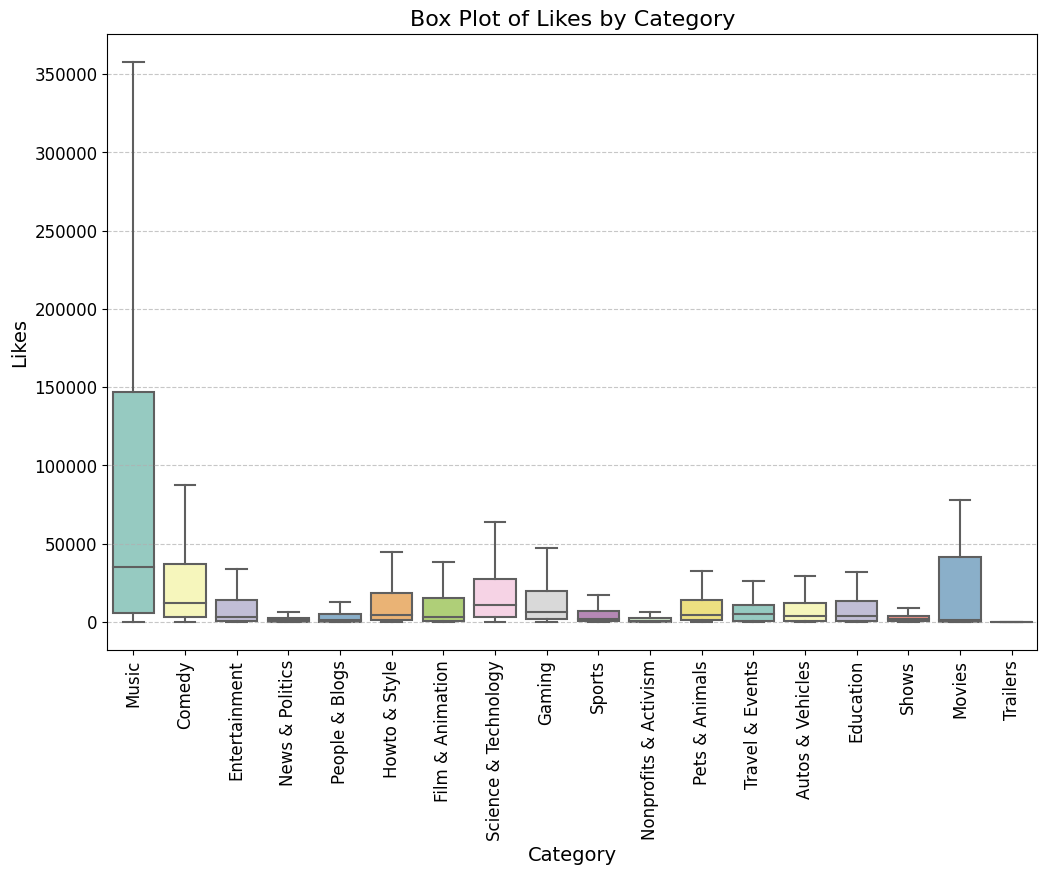

In [77]:

custom_palette = sns.color_palette("Set3")

# Make the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='category_name', y='likes', data=full_df, palette=custom_palette, showfliers=False)
plt.xticks(rotation='vertical', fontsize=12)  # Adjust rotation and font size of x-axis labels
plt.yticks(fontsize=12)  # Adjust font size of y-axis labels
plt.title('Box Plot of Likes by Category', fontsize=16)  # Add a title
plt.xlabel('Category', fontsize=14)  # Label for x-axis
plt.ylabel('Likes', fontsize=14)  # Label for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better reference

# Show the plot
plt.show()

##Which category  the audiance is enggaging and which not

In [78]:
full_df['likes'] = pd.to_numeric(full_df['likes'], errors='coerce')
full_df['dislikes'] = pd.to_numeric(full_df['dislikes'], errors='coerce')
full_df['comment_count'] = pd.to_numeric(full_df['comment_count'], errors='coerce')
full_df['views'] = pd.to_numeric(full_df['views'], errors='coerce')

In [79]:
full_df["like_rate"] = (full_df['likes']/full_df["views"])*100

full_df["dislike_rate"] = (full_df['dislikes']/full_df["views"])*100

full_df["comment_count_rate"] = (full_df['comment_count']/full_df["views"])*100


In [80]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'Unnamed: 0.1', 'Unnamed: 0',
       'category_name', 'like_rate', 'dislike_rate', 'comment_count_rate'],
      dtype='object')

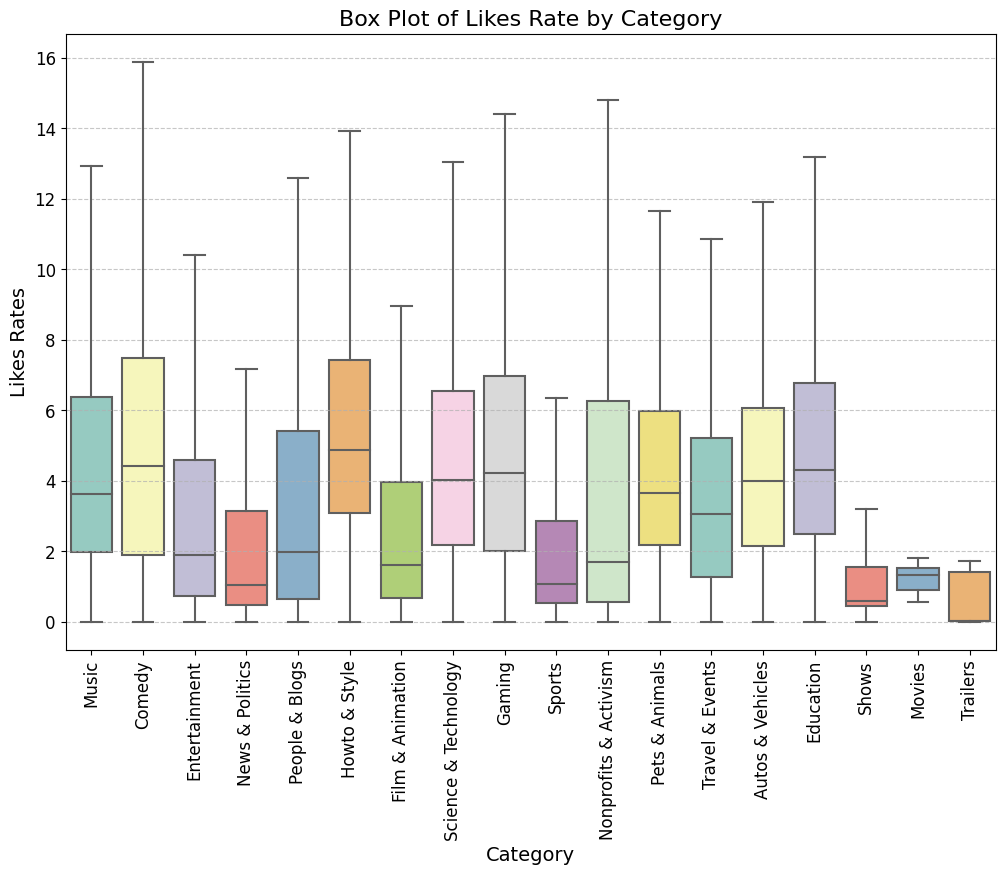

In [81]:
custom_palette = sns.color_palette("Set3")

# Make the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='category_name', y='like_rate', data=full_df, palette=custom_palette, showfliers=False)
plt.xticks(rotation='vertical', fontsize=12)  # Adjust rotation and font size of x-axis labels
plt.yticks(fontsize=12)  # Adjust font size of y-axis labels
plt.title('Box Plot of Likes Rate by Category', fontsize=16)  # Add a title
plt.xlabel('Category', fontsize=14)  # Label for x-axis
plt.ylabel('Likes Rates', fontsize=14)  # Label for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better reference

# Show the plot
plt.show()

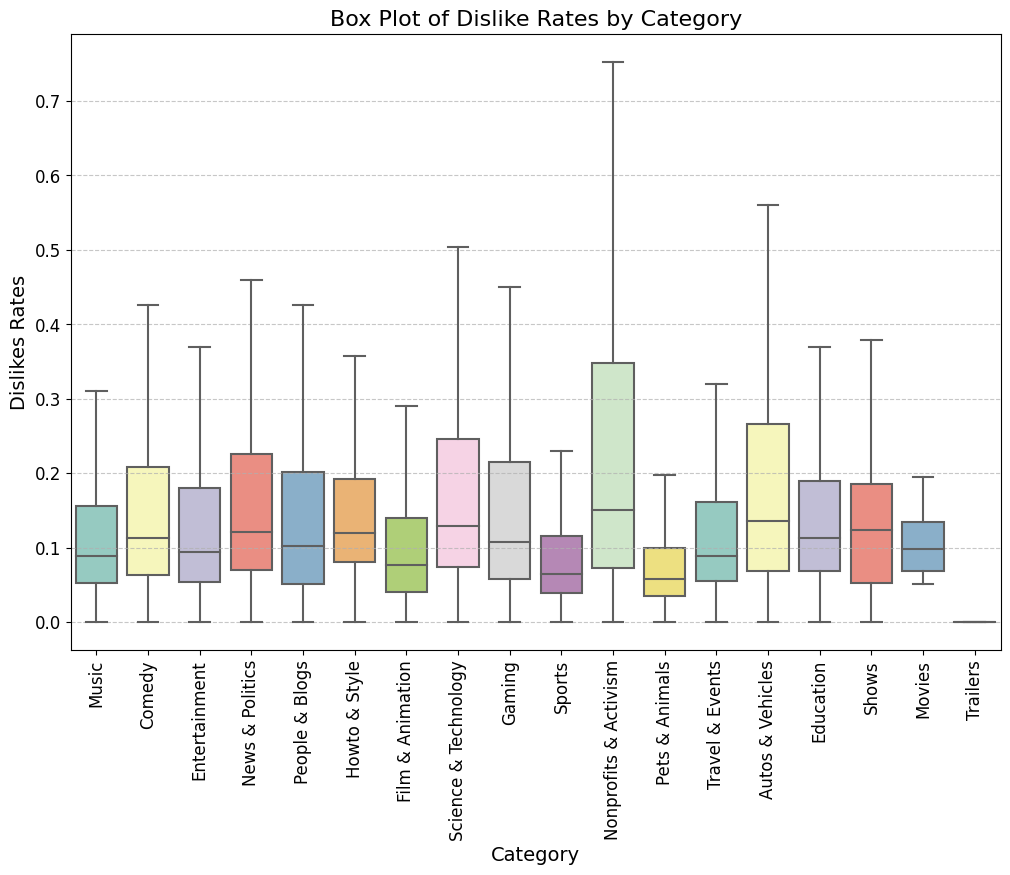

In [82]:
custom_palette = sns.color_palette("Set3")

# Make the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='category_name', y='dislike_rate', data=full_df, palette=custom_palette, showfliers=False)
plt.xticks(rotation='vertical', fontsize=12)  # Adjust rotation and font size of x-axis labels
plt.yticks(fontsize=12)  # Adjust font size of y-axis labels
plt.title('Box Plot of Dislike Rates by Category', fontsize=16)  # Add a title
plt.xlabel('Category', fontsize=14)  # Label for x-axis
plt.ylabel('Dislikes Rates', fontsize=14)  # Label for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better reference

# Show the plot
plt.show()

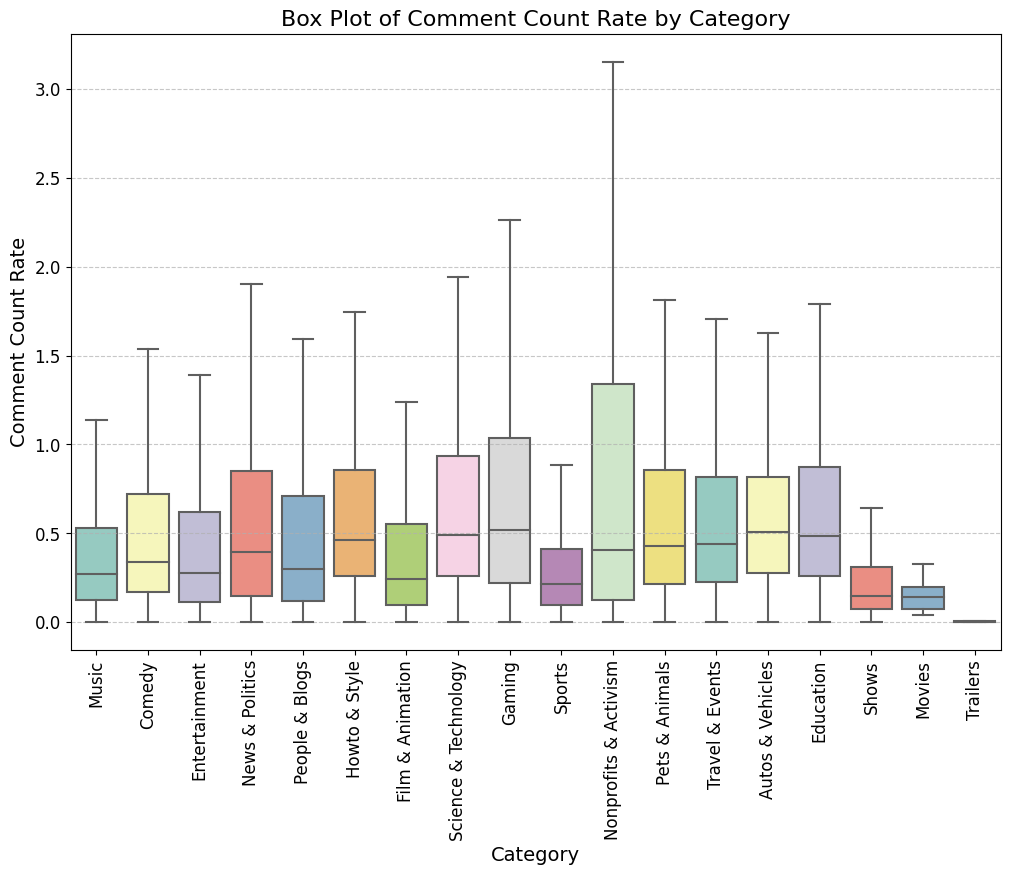

In [83]:
custom_palette = sns.color_palette("Set3")

# Make the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='category_name', y='comment_count_rate', data=full_df, palette=custom_palette, showfliers=False)
plt.xticks(rotation='vertical', fontsize=12)  # Adjust rotation and font size of x-axis labels
plt.yticks(fontsize=12)  # Adjust font size of y-axis labels
plt.title('Box Plot of Comment Count Rate by Category', fontsize=16)  # Add a title
plt.xlabel('Category', fontsize=14)  # Label for x-axis
plt.ylabel('Comment Count Rate', fontsize=14)  # Label for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better reference

# Show the plot
plt.show()

##Corelation Analysis

In [84]:
#corelation matrix
full_df[["dislikes","likes","comment_count","views"]].corr()

,dislikes,likes,comment_count,views
dislikes,1.000000,0.451809,0.747915,0.405428
likes,0.451809,1.000000,0.763874,0.779531
comment_count,0.747915,0.763874,1.000000,0.489637
views,0.405428,0.779531,0.489637,1.000000


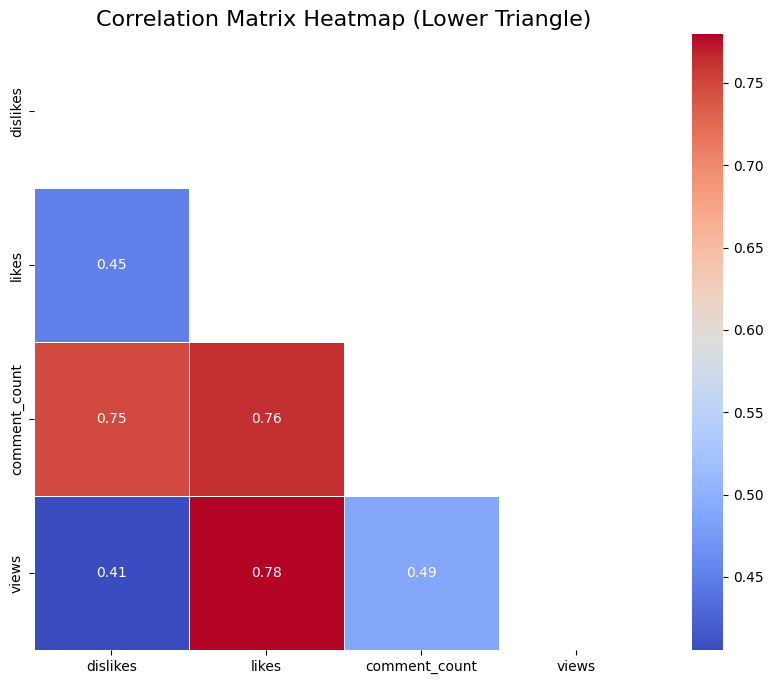

In [85]:
# Select the relevant columns for the correlation matrix
correlation_data = full_df[["dislikes", "likes", "comment_count", "views"]].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_data, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn with the lower triangle masked
sns.heatmap(correlation_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=mask)

# Add a title
plt.title('Correlation Matrix Heatmap (Lower Triangle)', fontsize=16)

# Show the plot
plt.show()

##Which channels have largest numbers of trending videos

In [86]:
cdf = full_df.groupby(["channel_title"]).size().sort_values(ascending = False).reset_index()

In [87]:
cdf= cdf.rename(columns={0:"total_videos"})

In [88]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,2130
1,WWE,1929
2,Late Night with Seth Meyers,1776
3,TheEllenShow,1665
4,Jimmy Kimmel Live,1584
...,...,...
58539,Ã«ÂÂ¤Ã«Â¡ÂÃ­ÂÂÃ«Â¸Â,1
58540,ÃÂÃÂ³ÃÂÃÂ¸ÃÂÃÂ¿ÃÂÃÂ½ÃÂÃÂ¾ÃÂÃ...,1
58541,ÃÂÃÂ²ÃÂÃÂ¾ÃÂÃÂ²ÃÂÃÂ¸ÃÂÃÂº ÃÂÃ...,1
58542,ÃÂÃÂ²ÃÂÃÂ¸ÃÂÃÂ½ÃÂÃÂ´ÃÂÃÂ¸ ÃÂÃ...,1


In [89]:
import plotly.express as px

In [90]:


fig = px.bar(cdf[0:20], x="channel_title", y="total_videos", title="Number of Videos per Channel")

# Update axis labels and layout as needed
fig.update_layout(xaxis_title="Channel Title", yaxis_title="Total Videos")
fig.update_traces(marker_color='skyblue')  # Customize the color if needed

# Show the plot
fig.show()

##Effect on punctuation from likes, dislikes and views

In [91]:
import string

In [92]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [93]:
def punc_text(text):
    # Check if the text is a non-null string
    if isinstance(text, str):
        return len([char for char in text if char in string.punctuation])
    else:
        return 0  # Return 0 for NaN or non-string values

# Apply the function to the 'title' column
full_df['title_punctuation_count'] = full_df['title'].apply(punc_text)

In [94]:
full_df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,Unnamed: 0.1,Unnamed: 0,category_name,like_rate,dislike_rate,comment_count_rate,title_punctuation_count
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,...,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,NaN,NaN,Music,4.589104,0.253051,0.733639,4


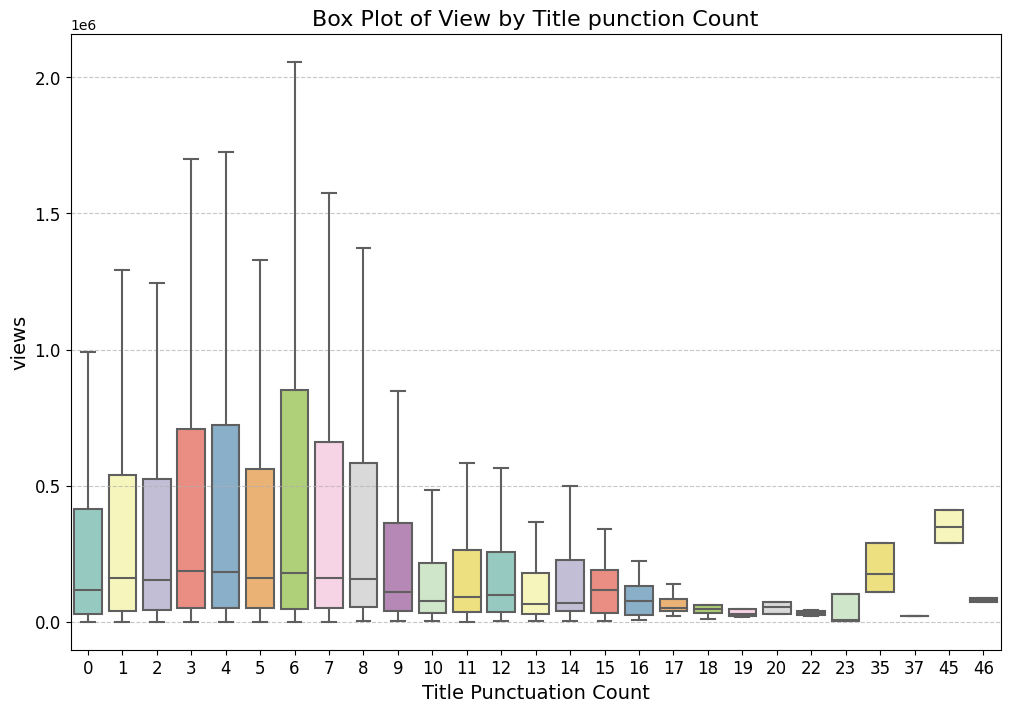

In [95]:
custom_palette = sns.color_palette("Set3")

# Make the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='title_punctuation_count', y='views', data=full_df, palette=custom_palette, showfliers=False)
plt.xticks( fontsize=12)  # Adjust  font size of x-axis labels
plt.yticks(fontsize=12)  # Adjust font size of y-axis labels
plt.title('Box Plot of View by Title punction Count', fontsize=16)  # Add a title
plt.xlabel('Title Punctuation Count', fontsize=14)  # Label for x-axis
plt.ylabel('views', fontsize=14)  # Label for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better reference

# Show the plot
plt.show()